In [1]:
import pandas as pd
import numpy as np

In [3]:
weather_data = pd.read_csv('weather_2020.csv')
weather_data.head()

,Time,ParameterName,ParameterValue
0,2020-11-01T00:00:00Z,TA_PT1H_AVG,6.5
1,2020-11-01T00:00:00Z,TA_PT1H_MAX,6.6
2,2020-11-01T00:00:00Z,TA_PT1H_MIN,6.3
3,2020-11-01T00:00:00Z,RH_PT1H_AVG,95.0
4,2020-11-01T00:00:00Z,WS_PT1H_AVG,3.3


In [24]:
# Convert 'ParameterValue' column to numeric, ignoring errors
weather_data['ParameterValue'] = pd.to_numeric(weather_data['ParameterValue'], errors='coerce')

# Drop rows with NaN or non-numeric values
weather_data = weather_data.dropna(subset=['ParameterValue'])

weather_data.head()

,Time,ParameterName,ParameterValue
0,2020-11-01T00:00:00Z,TA_PT1H_AVG,6.5
1,2020-11-01T00:00:00Z,TA_PT1H_MAX,6.6
2,2020-11-01T00:00:00Z,TA_PT1H_MIN,6.3
3,2020-11-01T00:00:00Z,RH_PT1H_AVG,95.0
4,2020-11-01T00:00:00Z,WS_PT1H_AVG,3.3


In [16]:
# Filter the DataFrame for each parameter
rh_data = weather_data[weather_data['ParameterName'] == 'RH_PT1H_AVG']
temp_avg_data = weather_data[weather_data['ParameterName'].isin(['TA_PT1H_AVG', 'TA_PT1H_MAX', 'TA_PT1H_MIN'])]
wind_speed_data = weather_data[weather_data['ParameterName'].isin(['WS_PT1H_AVG', 'WS_PT1H_MAX', 'WS_PT1H_MIN'])]
precipitation_data = weather_data[weather_data['ParameterName'] == 'precipitation_amount']
pressure_data = weather_data[weather_data['ParameterName'] == 'PA_PT1H_AVG']

# Calculate the mean value for each parameter
rh_avg = rh_data['ParameterValue'].mean()
temp_avg = temp_avg_data.groupby('Time')['ParameterValue'].mean().mean()  # Average of the mean temperature values
wind_speed_avg = wind_speed_data.groupby('Time')['ParameterValue'].mean().mean()  # Average of the mean wind speed values
precipitation_avg = precipitation_data['ParameterValue'].mean()
pressure_avg = pressure_data['ParameterValue'].mean()

# Print the calculated average values
print("Relative Humidity Average:", rh_avg)
print("Temperature Average:", temp_avg)
print("Wind Speed Average:", wind_speed_avg)
print("Precipitation Amount Average:", precipitation_avg)
print("Pressure Average:", pressure_avg)

Relative Humidity Average: 87.90138674884437
Temperature Average: 2.7347202295552364
Wind Speed Average: 3.9195121951219507
Precipitation Amount Average: nan
Pressure Average: 1012.6341463414634


In [18]:
# Calculate minimum, maximum, and median values for each parameter
result = weather_data.groupby('ParameterName')['ParameterValue'].agg(['min', 'max', 'median'])

# Find the hour with the highest value for each parameter
max_hour_indices = weather_data.groupby('ParameterName')['ParameterValue'].idxmax()
max_hour_values = weather_data.loc[max_hour_indices, ['Time', 'ParameterName', 'ParameterValue']]

# Print the calculated statistics
print("Minimum, Maximum, and Median Values:")
print(result)
print("\nHour with the highest value for each parameter:")
print(max_hour_values)

Minimum, Maximum, and Median Values:
                 min     max  median
ParameterName                       
PA_PT1H_AVG    977.3  1032.6  1013.7
RH_PT1H_AVG     61.0   100.0    89.0
TA_PT1H_AVG     -8.4    10.9     2.8
TA_PT1H_MAX     -7.8    11.1     3.0
TA_PT1H_MIN     -9.1    10.9     2.5
WD_PT1H_AVG      4.0   359.0   188.0
WS_PT1H_AVG      0.4    10.3     3.7
WS_PT1H_MAX      0.7    12.3     4.4
WS_PT1H_MIN      0.1     9.5     3.1

Hour with the highest value for each parameter:
                      Time ParameterName  ParameterValue
2818  2020-11-10T18:00:00Z   PA_PT1H_AVG          1032.6
3327  2020-11-12T13:00:00Z   RH_PT1H_AVG           100.0
648   2020-11-03T06:00:00Z   TA_PT1H_AVG            10.9
649   2020-11-03T06:00:00Z   TA_PT1H_MAX            11.1
650   2020-11-03T06:00:00Z   TA_PT1H_MIN            10.9
7615  2020-11-27T10:00:00Z   WD_PT1H_AVG           359.0
436   2020-11-02T12:00:00Z   WS_PT1H_AVG            10.3
461   2020-11-02T14:00:00Z   WS_PT1H_MAX           

In [19]:
import matplotlib.pyplot as plt

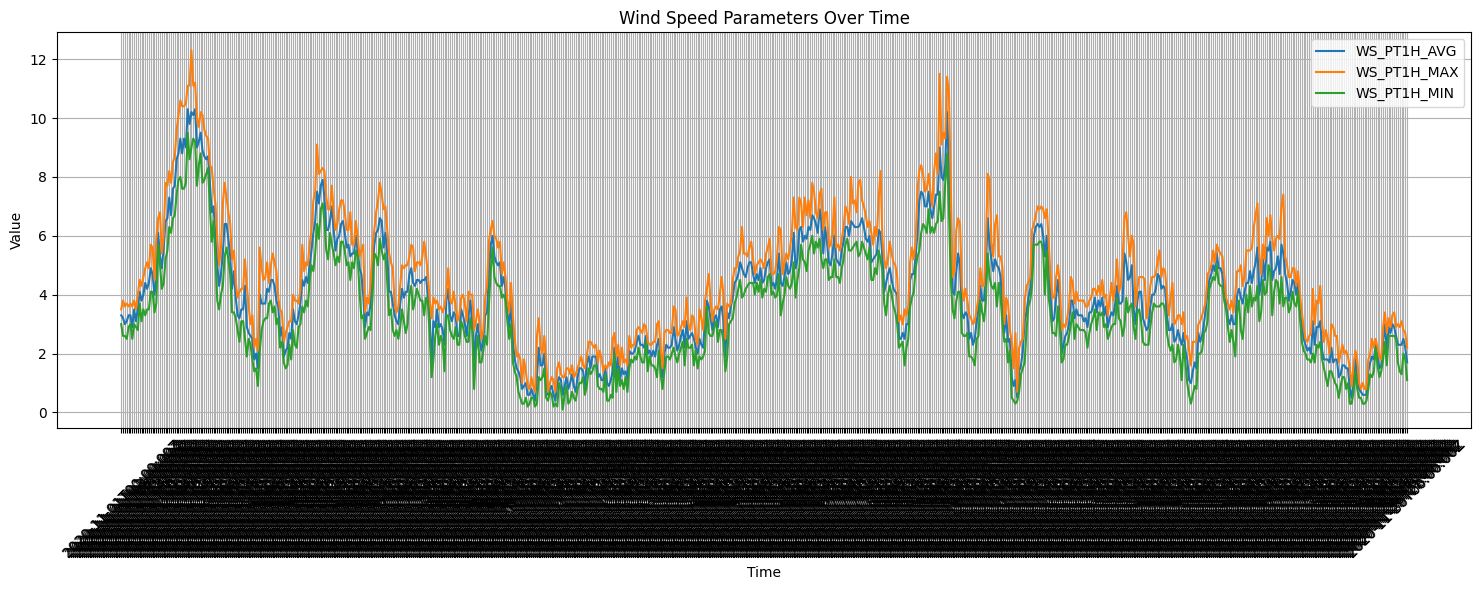

In [21]:
# Filter the DataFrame for wind speed parameters
parameters_to_plot_1 = ['WS_PT1H_AVG', 'WS_PT1H_MAX', 'WS_PT1H_MIN']
data_plot = weather_data[weather_data['ParameterName'].isin(parameters_to_plot_1)]

# Pivot the DataFrame to have Time as index and ParameterName as columns
data_pivot = data_plot.pivot(index='Time', columns='ParameterName', values='ParameterValue')

# Plot the wind speed data
plt.figure(figsize=(15, 6))
for parameter in parameters_to_plot_1:
    plt.plot(data_pivot.index, data_pivot[parameter], label=parameter)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Wind Speed Parameters Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

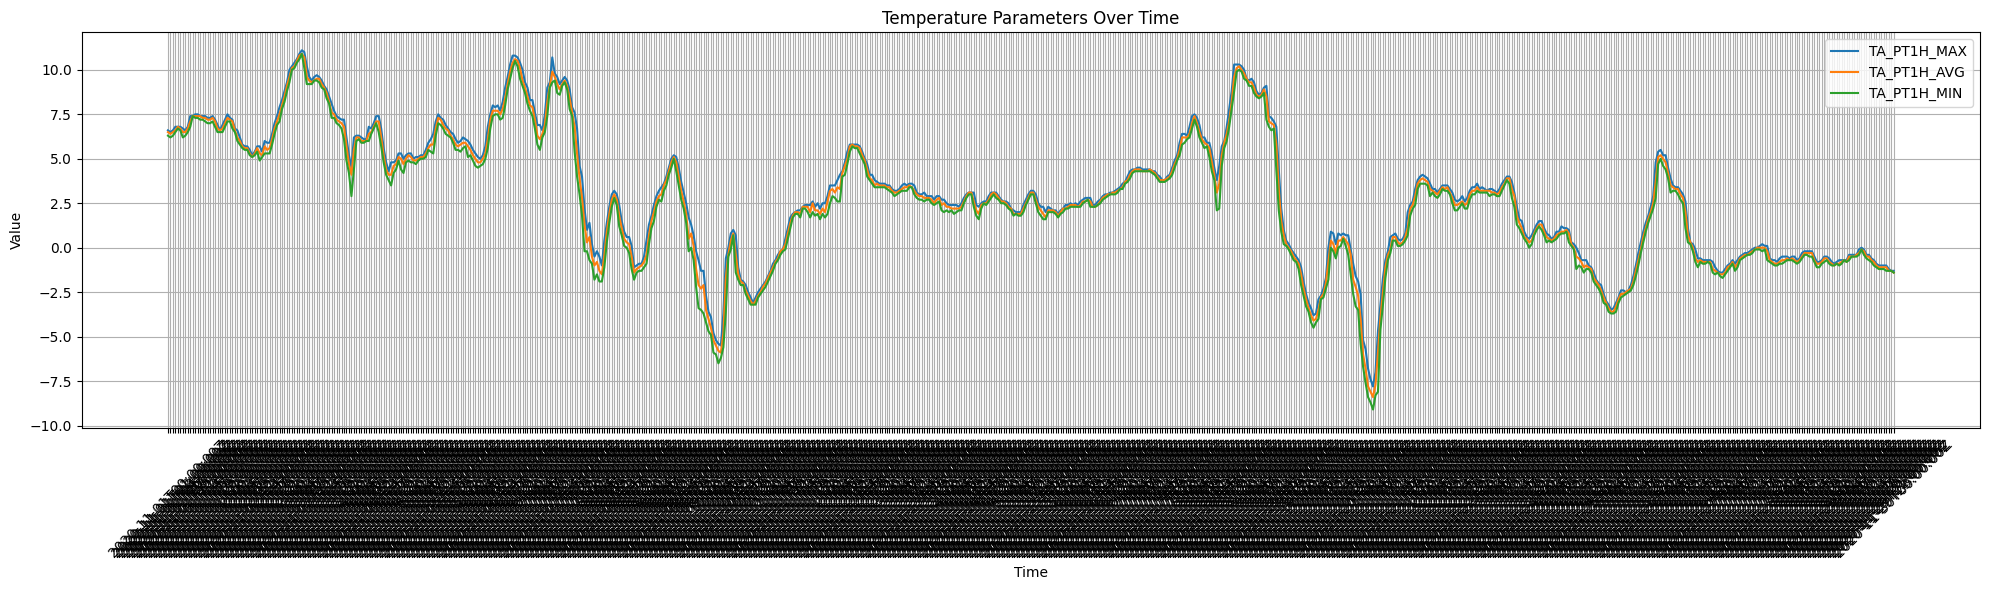

In [22]:
# Filter the DataFrame for temperature parameters
parameters_to_plot_2 = ['TA_PT1H_MAX', 'TA_PT1H_AVG', 'TA_PT1H_MIN']
data_plot = weather_data[weather_data['ParameterName'].isin(parameters_to_plot_2)]

# Pivot the DataFrame to have Time as index and ParameterName as columns
data_pivot = data_plot.pivot(index='Time', columns='ParameterName', values='ParameterValue')

# Plot the temperature data
plt.figure(figsize=(20, 6))
for parameter in parameters_to_plot_2:
    plt.plot(data_pivot.index, data_pivot[parameter], label=parameter)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Temperature Parameters Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

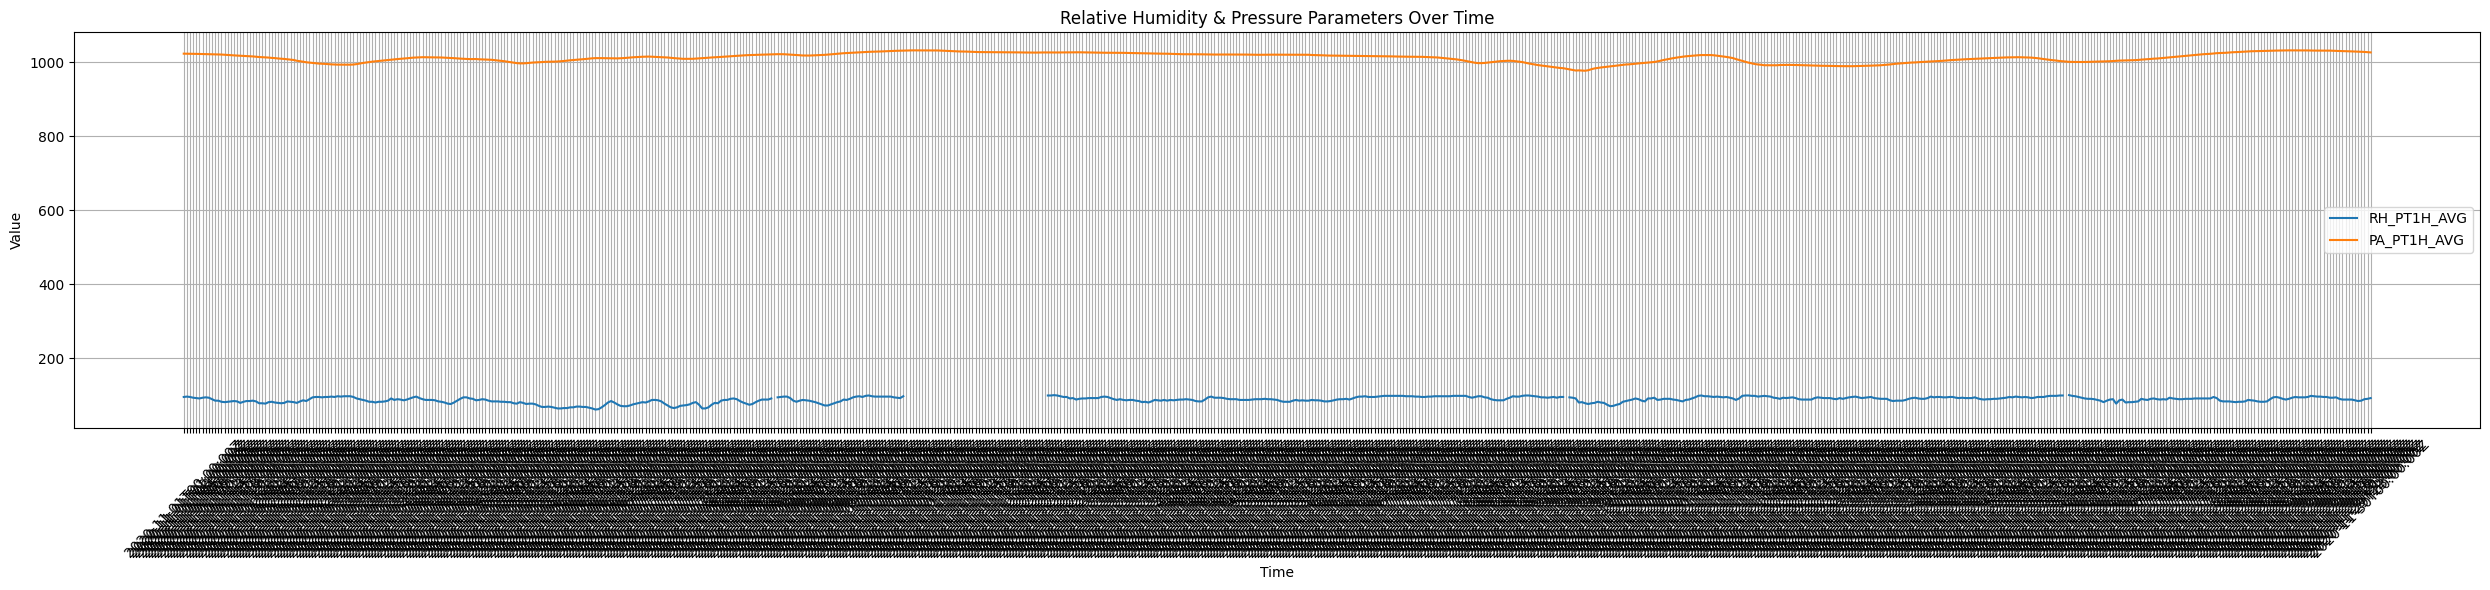

In [23]:
# Filter the DataFrame for relative humidity and pressure parameters
parameters_to_plot_3 = ['RH_PT1H_AVG', 'PA_PT1H_AVG']
data_plot = weather_data[weather_data['ParameterName'].isin(parameters_to_plot_3)]

# Pivot the DataFrame to have Time as index and ParameterName as columns
data_pivot = data_plot.pivot(index='Time', columns='ParameterName', values='ParameterValue')

# Plot the relative humidity and pressure data
plt.figure(figsize=(25, 6))
for parameter in parameters_to_plot_3:
    plt.plot(data_pivot.index, data_pivot[parameter], label=parameter)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Relative Humidity & Pressure Parameters Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()